In [57]:
import numpy as np
import pandas as pd

from typing import List, Tuple
import matplotlib.pyplot as plt
import math

from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, recall_score, precision_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, learning_curve

seed = 1234

_Some code taken from hw1_

In [58]:
# Load the features and labels for the MNIST dataset
# This might take a minute to download the images.
fmnist_X, fmnist_y = fetch_openml(name='Fashion-MNIST', as_frame=False, return_X_y=True)

# Convert labels to integer data type
fmnist_y = fmnist_y.astype(int)

X_tr, X_te, y_tr, y_te = train_test_split(fmnist_X, fmnist_y, test_size=0.25, random_state=1234, shuffle=True)

C:\Users\jcpm2\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


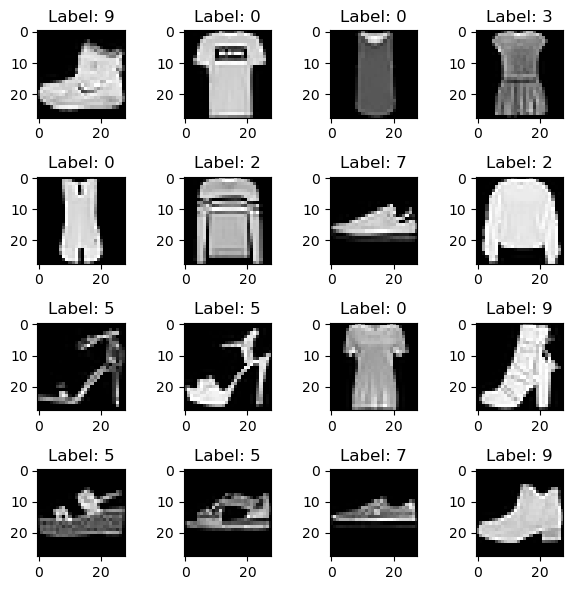

In [13]:
# Some default settings for our plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Create a figure with 4 rows and 4 columns
figure, axes = plt.subplots(4, 4, figsize=(6, 6))  

### YOUR CODE STARTS HERE ###
# Plot the first 16 images in our dataset.
# Include a title on each subplot to indicate the corresponding label.
# (≈ 5 lines of code)
for i in range(16):
    axes[i//4][i%4].imshow(fmnist_X[i].reshape(28,28))
    axes[i//4, i%4].set_title(f'Label: {fmnist_y[i]}')

### YOUR CODE ENDS HERE  ###

plt.tight_layout()

## Procedure:

1. Train sci-kit classifier
2. Get accuracy, precision, recall, confusion matrix, roc auc
3. Plot learning curve
4. At the very end, plot everything against one another

In [52]:
def plot_learning_Curve(cls, X_tr, y_tr):
    train_sizes, train_scores, test_scores = learning_curve(
        cls, X_tr, y_tr, cv=5, scoring='accuracy',
        train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
        )
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure()
    plt.title("Learning Curve (kNN)")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    plt.legend(loc="best")
    plt.show()

## KNN


In [53]:
#Tim

## Logistic

In [59]:
#Brendon
classifier = LogisticRegression(penalty='l1', solver='liblinear', fit_intercept=True)
classifier.fit(X_tr, y_tr)
prediction = classifier.predict(X_te)

Accuracy: 0.8443428571428572
Recall: 0.8443428571428572
Precision: 0.8417950773955843
ROC AUC: 0.9811709984131514
Confusion Matrix: 


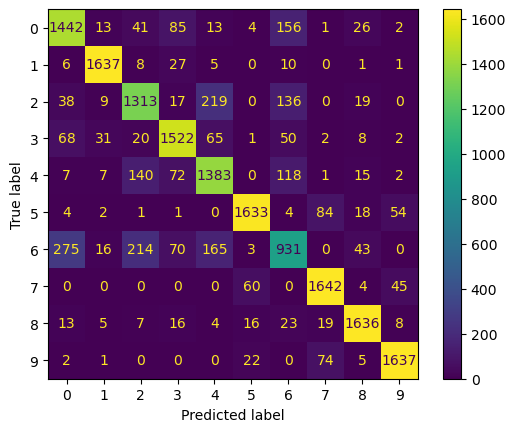

In [60]:
print("Accuracy: " + str(accuracy_score(y_te,prediction)))
print("Recall: " + str(recall_score(y_te, prediction, average="weighted")))
print("Precision: " +str(precision_score(y_te, prediction, average="weighted")))
probs = classifier.predict_proba(X_te)
print("ROC AUC: " +str(roc_auc_score(y_te, probs, multi_class="ovo")))
print("Confusion Matrix: ")
cm = confusion_matrix(y_te,prediction)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot(); 


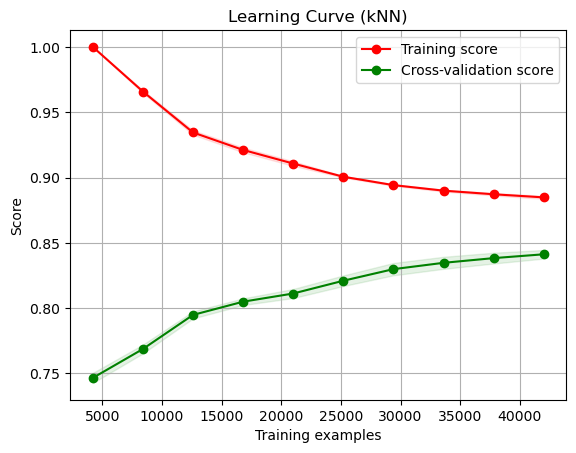

In [61]:
plot_learning_Curve(classifier, X_tr, y_tr)

## Neural Network


C:\Users\jcpm2\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.8076
Recall: 0.8076
Precision: 0.8071718206760017
ROC AUC: 0.5005442113593249
Confusion Matrix: 


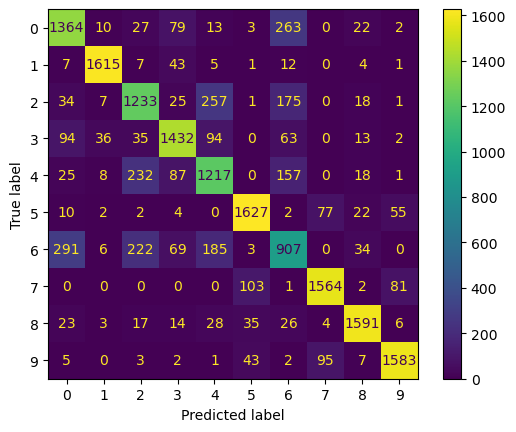

In [43]:
best_hyperparams = {
   'hidden_layer_sizes': (200,),
   'activation': 'relu', 
   'solver': 'sgd',
   'learning_rate': 'adaptive',
   'learning_rate_init': 0.01,
   'max_iter': 200,
   'n_iter_no_change': 200,
   'batch_size': 256
}


mlp = MLPClassifier(**best_hyperparams, shuffle=True, random_state=seed, verbose=False)
mlp.fit(X_tr, y_tr)
y_pred = mlp.predict(X_te)

print("Accuracy: " + str(accuracy_score(y_te, y_pred)))
print("Recall: " + str(recall_score(y_te, y_pred, average="weighted")))
print("Precision: " + str(precision_score(y_te, y_pred, average="weighted")))
probs = mlp.predict_proba(X_te)
print("ROC AUC: " +str(roc_auc_score(y_te, probs, multi_class="ovo")))
print("Confusion Matrix: ")
cm = confusion_matrix(y_te, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot(); 

## Decision Tree

Accuracy: 0.8076
Recall: 0.8076
Precision: 0.8071718206760017
ROC AUC: 0.9074593309892725
Confusion Matrix: 


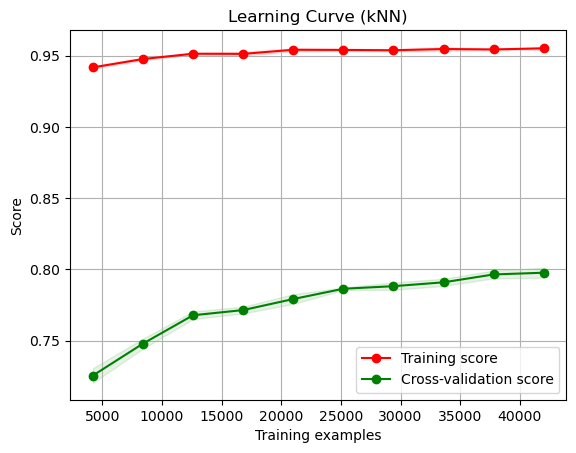

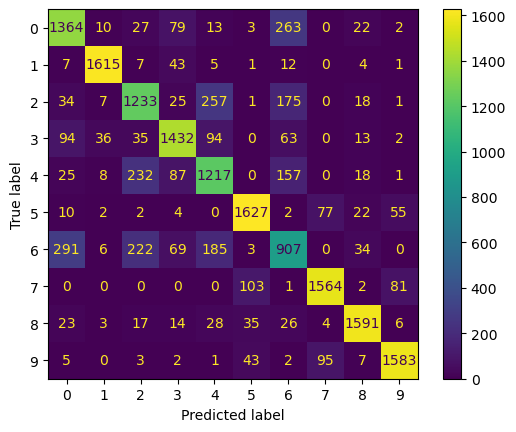

In [49]:
#Josh

clf = DecisionTreeClassifier(criterion='gini', min_samples_leaf=3, random_state=seed, max_depth = 20)
clf.fit(X_tr, y_tr)
y_pred = clf.predict(X_te)

print("Accuracy: " + str(accuracy_score(y_te, y_pred)))
print("Recall: " + str(recall_score(y_te, y_pred, average="weighted")))
print("Precision: " + str(precision_score(y_te, y_pred, average="weighted")))
probs = clf.predict_proba(X_te)
print("ROC AUC: " +str(roc_auc_score(y_te, probs, multi_class="ovo")))
print("Confusion Matrix: ")
cm = confusion_matrix(y_te, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot(); 
plot_learning_Curve(clf, X_tr, y_tr)
